# Práctica 2.1 - Perceptrón (puertas lógicas AND y OR) 



In [25]:
# Librerías:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import csv

## Periodo, Lr, umbral

In [26]:
# Definición del periodo, eta (learning rate) y theta (umbral)
periodo = 100
learning_rate = 0.1
umbral = 0.6

#Variable que se activará cuando el vector de errores sea todo ceros
Fin = False

## Datos para AND

In [27]:
# Generación de la matriz de pesos aleatoria
neurona_and = (np.random.random((2))*2)-1

# Definición de entradas y salidas esperadas de la puerta lógica AND
entradas = np.array([[0,0],[0,1],[1,0],[1,1]]) 
Yd = np.array([[0],[0],[0], [1]]) # Datos de salida

print("Pesos:\n",neurona_and)
print("Datos:\n", entradas)
print("\n Salida esperada:\n", Yd)

Pesos:
 [-0.01751762 -0.36584317]
Datos:
 [[0 0]
 [0 1]
 [1 0]
 [1 1]]

 Salida esperada:
 [[0]
 [0]
 [0]
 [1]]


## Datos para XOR

In [28]:
# Generamos los pesos; truncamos para evitar que coja muchos decimales
datos1_xor = round(np.random.uniform(-1,1),3) 
datos2_xor =  round(np.random.uniform(-1,1),3)

# Generamos una matriz de pesos aleatoria en intervalo -1,1
neurona_xor = [datos1_xor,datos2_xor]

# Definición de entradas y salidas esperadas de la puerta lógica XOR
entradas = [[0,0],[0,1],[1,0],[1,1]]
Yd = np.array([[0],[1],[1], [0]]) # Datos de salida

print("Pesos:\n",neurona_xor)
print("Datos:\n", entradas)
print("\n Salida esperada:\n", Yd)

Pesos:
 [0.289, -0.736]
Datos:
 [[0, 0], [0, 1], [1, 0], [1, 1]]

 Salida esperada:
 [[0]
 [1]
 [1]
 [0]]


## Función de activación

In [29]:
def funcionActivacion(neurona,entradas,umbral):
    if((np.dot(neurona,entradas) - umbral) < 0):
        return 0
    else:
        return 1

## Función de aprendizaje

In [30]:
def aprendizaje(neurona,learning_rate,expected,obtenido,entradas):
    # Convertimos ambos a np.array (suma de vectores)
    neuronaN = np.array(neurona) + np.array((learning_rate*(expected-obtenido))*np.transpose(entradas)) 
    return neuronaN

## Escribir csv

In [31]:
def escribircsv(fila):
    file = open('LP1-Perceptron.csv', 'a')
    escritor = csv.writer(file)
    escritor.writerow(fila)
    file.close()

def limpiarcsv():
    file = open('LP1-Perceptron.csv', 'w')
    file.close()

## Entrenamiento AND

In [32]:
def entrenamiento_and(Fin,entradas,neurona,umbral,learning_rate, iteraciones, mostrar, callback=None):
    limpiarcsv()
    escribircsv("AND")
    VectorErrores = [0, 0, 0, 0]
    Fin = False
    j = 0
    i = 1
    iter_sol = 0
    if(mostrar):
        print("================================== NEURONA AND ==============================")
        print("n_it x1,x2      w1,            w2       Yr   Yd  Err     w1+t,       w2+t")
        print("-----------------------------------------------------------------------------")
    while Fin==False and i < periodo: 
        for entrada in entradas:
                neurona_antes = neurona
                expected = entrada[0] * entrada[1]
                salida_obtenida = funcionActivacion(neurona, entrada,umbral)
                neurona = aprendizaje(neurona,learning_rate,expected,salida_obtenida,entrada)
                error = abs(expected-salida_obtenida)
                # Guardamos el error en el vector de errores:
                VectorErrores[j] = error
                # Generamos la fila que insertaremos en el csv
                fila = [i , entrada , neurona_antes , expected , salida_obtenida , error , neurona]
                escribircsv(fila)
                if(mostrar):
                    print(i," ",entrada," ",neurona_antes," ",expected," ",salida_obtenida," ",error," ", neurona)
                j+=1
        j = 0
        i+=1 
                    
             # Si el vector de errores es todo = 0, paramos:
        if VectorErrores == [0,0,0,0]:
                Fin = True
                iter_sol = i
                print("\nFin del algoritmo, SOLUCIÓN ENCONTRADA en %d iteraciones",iter_sol)
        elif i+1 == periodo:
                Fin = False
                iter_sol = i
                print("\nFin del algoritmo, SOLUCIÓN NO ENCONTRADA en las %d iteraciones", iter_sol)
    return iter_sol, neurona

### Ejecución

In [33]:
iteracion_sol, neurona_clasificar_and = entrenamiento_and(Fin,entradas,neurona_and,umbral,learning_rate,periodo,1)

================================== NEURONA AND ==============================
n_it x1,x2      w1,            w2       Yr   Yd  Err     w1+t,       w2+t
-----------------------------------------------------------------------------
1   [0, 0]   [-0.01751762 -0.36584317]   0   0   0   [-0.01751762 -0.36584317]
1   [0, 1]   [-0.01751762 -0.36584317]   0   0   0   [-0.01751762 -0.36584317]
1   [1, 0]   [-0.01751762 -0.36584317]   0   0   0   [-0.01751762 -0.36584317]
1   [1, 1]   [-0.01751762 -0.36584317]   1   0   1   [ 0.08248238 -0.26584317]
2   [0, 0]   [ 0.08248238 -0.26584317]   0   0   0   [ 0.08248238 -0.26584317]
2   [0, 1]   [ 0.08248238 -0.26584317]   0   0   0   [ 0.08248238 -0.26584317]
2   [1, 0]   [ 0.08248238 -0.26584317]   0   0   0   [ 0.08248238 -0.26584317]
2   [1, 1]   [ 0.08248238 -0.26584317]   1   0   1   [ 0.18248238 -0.16584317]
3   [0, 0]   [ 0.18248238 -0.16584317]   0   0   0   [ 0.18248238 -0.16584317]
3   [0, 1]   [ 0.18248238 -0.16584317]   0   0   0   [ 0.18

### Representación AND 

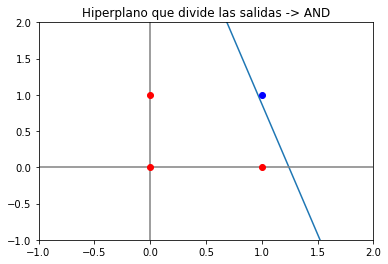

In [34]:
# Aplicamos la formula para calcular el hiperplano: x2 = -(w1/w2) * x1 + (theta/w2):
def hiperplano(x):
    return -(neurona_clasificar_and[0] / neurona_clasificar_and[1]) * x + (umbral / neurona_clasificar_and[1])

# Tomamos un rango de -5 hasta 5 en este caso, que son los valores que despues calcularemos con hiperplano(x)
x = range(-5, 5)

# El primer argumento es el rango que hemos marcado de -5 hasta 5
# El segundo argumento le vamos pasando todo este rango a la funcion f(x) para que calcule los valores de la recta
plt.plot(x, [hiperplano(i) for i in x])

# Establecemos los ejes de coordenadas
plt.axhline(0, color="grey")
plt.axvline(0, color="grey")

# Introducimos los puntos de la puerta AND, siendo los que tengan salida = 0 rojos y los de salida = 1 en azul
plt.plot(0,0, marker="o", color="red")
plt.plot(0,1, marker="o", color="red")
plt.plot(1,0, marker="o", color="red")
plt.plot(1,1, marker="o", color="blue")
    
plt.title('Hiperplano que divide las salidas -> AND')

# Límites de los ejes
plt.xlim(-1, 2)
plt.ylim(-1, 2)

plt.show()

## Entrenamiento XOR

In [35]:
def entrenamiento_xor(entradas,neurona,umbral,learning_rate,iteraciones,mostrar):
    escribircsv("XOR")
    if(mostrar):
        print("======================== NEURONA XOR ========================")
        print("n_it x1,x2      w1,     w2      Yr  Yd  Err   w1+t,   w2+t")
        print("-------------------------------------------------------------")
    errors = []
    for i in range(iteraciones):
        for entrada in entradas:
            neurona_antes = neurona
            expected = entrada[0] ^ entrada[1]
            salida_obtenida = funcionActivacion(neurona, entrada,umbral)
            neurona = aprendizaje(neurona,learning_rate,expected,salida_obtenida,entrada)
            error = abs(expected-salida_obtenida)
            errors.append(error)
            fila = [i+1 , entrada , neurona_antes , expected , salida_obtenida , error , neurona]
            escribircsv(fila)
            if(mostrar):
                print(i+1,";",entrada,";",neurona_antes,";",expected,";",salida_obtenida,";",error,";", neurona)
        iter_sol = i
    return iter_sol, neurona

### Ejecución

In [36]:
iteracion_sol, neurona_clasificar_xor = entrenamiento_xor(entradas,neurona_xor,umbral,learning_rate,periodo,1)

======================== NEURONA XOR ========================
n_it x1,x2      w1,     w2      Yr  Yd  Err   w1+t,   w2+t
-------------------------------------------------------------
1 ; [0, 0] ; [0.289, -0.736] ; 0 ; 0 ; 0 ; [ 0.289 -0.736]
1 ; [0, 1] ; [ 0.289 -0.736] ; 1 ; 0 ; 1 ; [ 0.289 -0.636]
1 ; [1, 0] ; [ 0.289 -0.636] ; 1 ; 0 ; 1 ; [ 0.389 -0.636]
1 ; [1, 1] ; [ 0.389 -0.636] ; 0 ; 0 ; 0 ; [ 0.389 -0.636]
2 ; [0, 0] ; [ 0.389 -0.636] ; 0 ; 0 ; 0 ; [ 0.389 -0.636]
2 ; [0, 1] ; [ 0.389 -0.636] ; 1 ; 0 ; 1 ; [ 0.389 -0.536]
2 ; [1, 0] ; [ 0.389 -0.536] ; 1 ; 0 ; 1 ; [ 0.489 -0.536]
2 ; [1, 1] ; [ 0.489 -0.536] ; 0 ; 0 ; 0 ; [ 0.489 -0.536]
3 ; [0, 0] ; [ 0.489 -0.536] ; 0 ; 0 ; 0 ; [ 0.489 -0.536]
3 ; [0, 1] ; [ 0.489 -0.536] ; 1 ; 0 ; 1 ; [ 0.489 -0.436]
3 ; [1, 0] ; [ 0.489 -0.436] ; 1 ; 0 ; 1 ; [ 0.589 -0.436]
3 ; [1, 1] ; [ 0.589 -0.436] ; 0 ; 0 ; 0 ; [ 0.589 -0.436]
4 ; [0, 0] ; [ 0.589 -0.436] ; 0 ; 0 ; 0 ; [ 0.589 -0.436]
4 ; [0, 1] ; [ 0.589 -0.436] ; 1 ; 0 ; 1 ; [ 0.589

44 ; [1, 0] ; [ 0.589 -0.036] ; 1 ; 0 ; 1 ; [ 0.689 -0.036]
44 ; [1, 1] ; [ 0.689 -0.036] ; 0 ; 1 ; 1 ; [ 0.589 -0.136]
45 ; [0, 0] ; [ 0.589 -0.136] ; 0 ; 0 ; 0 ; [ 0.589 -0.136]
45 ; [0, 1] ; [ 0.589 -0.136] ; 1 ; 0 ; 1 ; [ 0.589 -0.036]
45 ; [1, 0] ; [ 0.589 -0.036] ; 1 ; 0 ; 1 ; [ 0.689 -0.036]
45 ; [1, 1] ; [ 0.689 -0.036] ; 0 ; 1 ; 1 ; [ 0.589 -0.136]
46 ; [0, 0] ; [ 0.589 -0.136] ; 0 ; 0 ; 0 ; [ 0.589 -0.136]
46 ; [0, 1] ; [ 0.589 -0.136] ; 1 ; 0 ; 1 ; [ 0.589 -0.036]
46 ; [1, 0] ; [ 0.589 -0.036] ; 1 ; 0 ; 1 ; [ 0.689 -0.036]
46 ; [1, 1] ; [ 0.689 -0.036] ; 0 ; 1 ; 1 ; [ 0.589 -0.136]
47 ; [0, 0] ; [ 0.589 -0.136] ; 0 ; 0 ; 0 ; [ 0.589 -0.136]
47 ; [0, 1] ; [ 0.589 -0.136] ; 1 ; 0 ; 1 ; [ 0.589 -0.036]
47 ; [1, 0] ; [ 0.589 -0.036] ; 1 ; 0 ; 1 ; [ 0.689 -0.036]
47 ; [1, 1] ; [ 0.689 -0.036] ; 0 ; 1 ; 1 ; [ 0.589 -0.136]
48 ; [0, 0] ; [ 0.589 -0.136] ; 0 ; 0 ; 0 ; [ 0.589 -0.136]
48 ; [0, 1] ; [ 0.589 -0.136] ; 1 ; 0 ; 1 ; [ 0.589 -0.036]
48 ; [1, 0] ; [ 0.589 -0.036] ; 1 ; 0 ; 

90 ; [1, 0] ; [ 0.589 -0.036] ; 1 ; 0 ; 1 ; [ 0.689 -0.036]
90 ; [1, 1] ; [ 0.689 -0.036] ; 0 ; 1 ; 1 ; [ 0.589 -0.136]
91 ; [0, 0] ; [ 0.589 -0.136] ; 0 ; 0 ; 0 ; [ 0.589 -0.136]
91 ; [0, 1] ; [ 0.589 -0.136] ; 1 ; 0 ; 1 ; [ 0.589 -0.036]
91 ; [1, 0] ; [ 0.589 -0.036] ; 1 ; 0 ; 1 ; [ 0.689 -0.036]
91 ; [1, 1] ; [ 0.689 -0.036] ; 0 ; 1 ; 1 ; [ 0.589 -0.136]
92 ; [0, 0] ; [ 0.589 -0.136] ; 0 ; 0 ; 0 ; [ 0.589 -0.136]
92 ; [0, 1] ; [ 0.589 -0.136] ; 1 ; 0 ; 1 ; [ 0.589 -0.036]
92 ; [1, 0] ; [ 0.589 -0.036] ; 1 ; 0 ; 1 ; [ 0.689 -0.036]
92 ; [1, 1] ; [ 0.689 -0.036] ; 0 ; 1 ; 1 ; [ 0.589 -0.136]
93 ; [0, 0] ; [ 0.589 -0.136] ; 0 ; 0 ; 0 ; [ 0.589 -0.136]
93 ; [0, 1] ; [ 0.589 -0.136] ; 1 ; 0 ; 1 ; [ 0.589 -0.036]
93 ; [1, 0] ; [ 0.589 -0.036] ; 1 ; 0 ; 1 ; [ 0.689 -0.036]
93 ; [1, 1] ; [ 0.689 -0.036] ; 0 ; 1 ; 1 ; [ 0.589 -0.136]
94 ; [0, 0] ; [ 0.589 -0.136] ; 0 ; 0 ; 0 ; [ 0.589 -0.136]
94 ; [0, 1] ; [ 0.589 -0.136] ; 1 ; 0 ; 1 ; [ 0.589 -0.036]
94 ; [1, 0] ; [ 0.589 -0.036] ; 1 ; 0 ; 

### Representación XOR

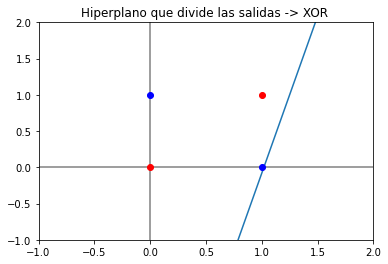

Como se puede comprobar, con un solo perceptrón es imposible dividir las salidas


In [37]:
# Aplicamos la formula para calcular el hiperplano: x2 = -(w1/w2) * x1 + (theta/w2):
def hiperplano(x):
    return -(neurona_clasificar_xor[0] / neurona_clasificar_xor[1]) * x + (umbral / neurona_clasificar_xor[1])

# Tomamos un rango de -5 hasta 5 en este caso, que son los valores que despues calcularemos con hiperplano(x)
x = range(-5, 5)

# El primer argumento es el rango que hemos marcado de -5 hasta 5
# El segundo argumento le vamos pasando todo este rango a la funcion f(x) para que calcule los valores de la recta
plt.plot(x, [hiperplano(i) for i in x])

# Establecemos los ejes de coordenadas
plt.axhline(0, color="grey")
plt.axvline(0, color="grey")

# Introducimos los puntos de la puerta XOR, siendo los que tengan salida = 0 rojos y los de salida = 1 en azul
plt.plot(0,0, marker="o", color="red")
plt.plot(0,1, marker="o", color="blue")
plt.plot(1,0, marker="o", color="blue")
plt.plot(1,1, marker="o", color="red")

plt.title('Hiperplano que divide las salidas -> XOR ')

# Límites de los ejes
plt.xlim(-1, 2)
plt.ylim(-1, 2)

plt.show()
print("Como se puede comprobar, con un solo perceptrón es imposible dividir las salidas")

### PRUEBAS

In [38]:
#neurona_and = (np.random.random((2))*2)-1 # Generación de la matriz de pesos aleatoria

#entradas = np.array([[0,0],[0,1],[1,0],[1,1]]) # Para el entramiento, elegiremos aleatoriamente una de estas entradas constantemente (2 entradas)

# Variables relacionadas con el periodo, eta, theta
#periodo = 100
#learning_rate = 0.1
#umbral = 0.2
#Variable a utilizar más adelante en el entrenamiento de la puerta AND

#neurona_clasificar_and = prueba_entrenamiento_and(Fin,entradas,neurona_and,umbral,learning_rate,periodo)


In [39]:
#Definición de los rangos del learning_rate y umbral 
umbral = [i/10 for i in range(1, 10)]
learning_rate = [i/100 for i in range(5, 60, 5)]

periodo = 100

Fin=False

In [40]:
def prueba_entrenamiento_and(entradas, neuronas, umbrales, learning_rates, periodos, mostrar=False):
    resultados = pd.DataFrame(columns=['lr', 'umbral', 'iteracion', 'solucion'])

    for lr in learning_rates:
        for th in umbrales:
            resultado = {}
            resultado['lr'] = lr
            resultado['umbral'] = th
            
            iter_sol, solucion = entrenamiento_and(False, entradas, neuronas, th, lr, periodos, mostrar)
            resultado['iteracion'] = iter_sol
            if iter_sol+1 == periodo:
                resultado['solucion'] = solucion if iter_sol+1 < periodos else False
            else:
                resultado['solucion'] = True
            
            resultados = resultados.append(resultado, ignore_index=True)

    return resultados

In [41]:
resultados_and = prueba_entrenamiento_and(entradas, neurona_and, umbral, learning_rate, 100, 0)
resultados_and


Fin del algoritmo, SOLUCIÓN ENCONTRADA en %d iteraciones 11

Fin del algoritmo, SOLUCIÓN ENCONTRADA en %d iteraciones 11

Fin del algoritmo, SOLUCIÓN ENCONTRADA en %d iteraciones 11

Fin del algoritmo, SOLUCIÓN ENCONTRADA en %d iteraciones 10

Fin del algoritmo, SOLUCIÓN ENCONTRADA en %d iteraciones 11

Fin del algoritmo, SOLUCIÓN ENCONTRADA en %d iteraciones 12

Fin del algoritmo, SOLUCIÓN ENCONTRADA en %d iteraciones 13

Fin del algoritmo, SOLUCIÓN ENCONTRADA en %d iteraciones 14

Fin del algoritmo, SOLUCIÓN ENCONTRADA en %d iteraciones 15

Fin del algoritmo, SOLUCIÓN ENCONTRADA en %d iteraciones 7

Fin del algoritmo, SOLUCIÓN ENCONTRADA en %d iteraciones 7

Fin del algoritmo, SOLUCIÓN ENCONTRADA en %d iteraciones 7

Fin del algoritmo, SOLUCIÓN ENCONTRADA en %d iteraciones 6

Fin del algoritmo, SOLUCIÓN ENCONTRADA en %d iteraciones 7

Fin del algoritmo, SOLUCIÓN ENCONTRADA en %d iteraciones 7

Fin del algoritmo, SOLUCIÓN ENCONTRADA en %d iteraciones 8

Fin del algoritmo, SOLUCIÓN EN

,lr,umbral,iteracion,solucion
0,0.05,0.1,11,True
1,0.05,0.2,11,True
2,0.05,0.3,11,True
3,0.05,0.4,10,True
4,0.05,0.5,11,True
5,0.05,0.6,12,True
6,0.05,0.7,13,True
7,0.05,0.8,14,True
8,0.05,0.9,15,True
9,0.10,0.1,7,True


In [42]:
pd.set_option('max_rows', 100)
resultados_and

,lr,umbral,iteracion,solucion
0,0.05,0.1,11,True
1,0.05,0.2,11,True
2,0.05,0.3,11,True
3,0.05,0.4,10,True
4,0.05,0.5,11,True
5,0.05,0.6,12,True
6,0.05,0.7,13,True
7,0.05,0.8,14,True
8,0.05,0.9,15,True
9,0.10,0.1,7,True


In [43]:
resultados_and.to_csv('resultados.csv', index=False)

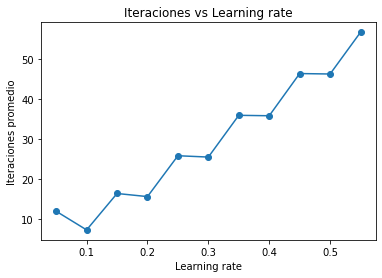

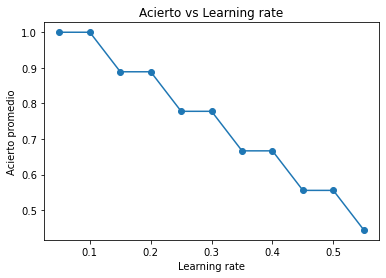

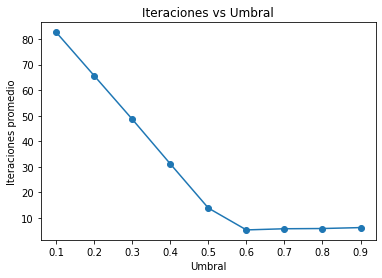

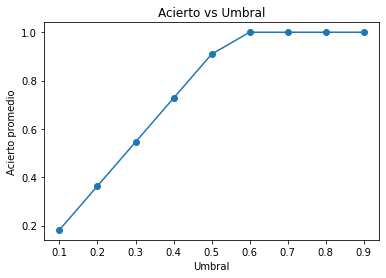

In [44]:
# Crear la figura y los ejes para la gráfica de iteraciones vs learning rate
fig, ax = plt.subplots()
# Agrupar los datos por learning rate y calcular la media de iteraciones para cada grupo
data_lr = resultados_and.groupby('lr')['iteracion'].mean()
# Graficar los datos
ax.plot(data_lr.index, data_lr.values, 'o-')
# Establecer los títulos y etiquetas de los ejes
ax.set_title('Iteraciones vs Learning rate')
ax.set_xlabel('Learning rate')
ax.set_ylabel('Iteraciones promedio')

# Crear la figura y los ejes para la gráfica de acierto vs learning rate
fig, ax = plt.subplots()
# Agrupar los datos por learning rate y calcular la media de aciertos para cada grupo
data_lr = resultados_and.groupby('lr')['solucion'].mean()
# Graficar los datos
ax.plot(data_lr.index, data_lr.values, 'o-')
# Establecer los títulos y etiquetas de los ejes
ax.set_title('Acierto vs Learning rate')
ax.set_xlabel('Learning rate')
ax.set_ylabel('Acierto promedio')

# Crear la figura y los ejes para la gráfica de iteraciones vs umbral
fig, ax = plt.subplots()
# Agrupar los datos por umbral y calcular la media de iteraciones para cada grupo
data_umbral = resultados_and.groupby('umbral')['iteracion'].mean()
# Graficar los datos
ax.plot(data_umbral.index, data_umbral.values, 'o-')
# Establecer los títulos y etiquetas de los ejes
ax.set_title('Iteraciones vs Umbral')
ax.set_xlabel('Umbral')
ax.set_ylabel('Iteraciones promedio')

# Crear la figura y los ejes para la gráfica de acierto vs umbral
fig, ax = plt.subplots()
# Agrupar los datos por umbral y calcular la media de aciertos para cada grupo
data_umbral = resultados_and.groupby('umbral')['solucion'].mean()
# Graficar los datos
ax.plot(data_umbral.index, data_umbral.values, 'o-')
# Establecer los títulos y etiquetas de los ejes
ax.set_title('Acierto vs Umbral')
ax.set_xlabel('Umbral')
ax.set_ylabel('Acierto promedio')

# Mostrar las gráficas
plt.show()


In [45]:
def prueba_entrenamiento_xor(entradas, neuronas, umbrales, learning_rates, periodos, mostrar=False):
    resultados = pd.DataFrame(columns=['lr', 'umbral', 'iteracion', 'solucion'])

    for lr in learning_rates:
        for th in umbrales:
            resultado = {}
            resultado['lr'] = lr
            resultado['umbral'] = th
            
            iter_sol, solucion = entrenamiento_xor(entradas, neuronas, th, lr, periodos, mostrar)
            resultado['iteracion'] = iter_sol
            if iter_sol+1 == periodo:
                resultado['solucion'] = solucion if iter_sol+1 < periodos else False
            else:
                resultado['solucion'] = True
            
            resultados = resultados.append(resultado, ignore_index=True)

    return resultados

In [46]:
resultados_xor = prueba_entrenamiento_xor(entradas, neurona_and, umbral, learning_rate, 100, 0)
resultados_xor

,lr,umbral,iteracion,solucion
0,0.05,0.1,99,False
1,0.05,0.2,99,False
2,0.05,0.3,99,False
3,0.05,0.4,99,False
4,0.05,0.5,99,False
5,0.05,0.6,99,False
6,0.05,0.7,99,False
7,0.05,0.8,99,False
8,0.05,0.9,99,False
9,0.10,0.1,99,False


In [47]:
resultados_xor.to_csv('resultados_xor.csv', index=False)

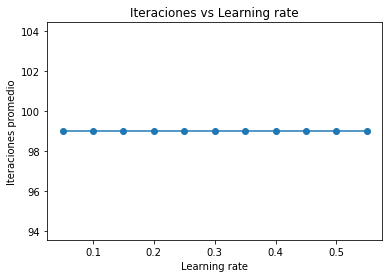

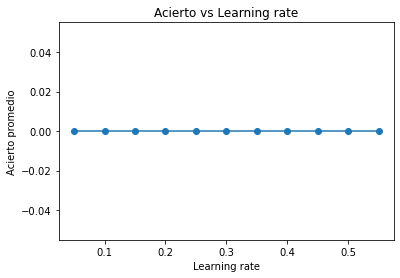

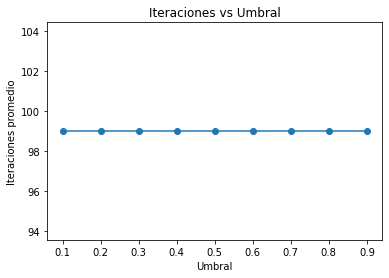

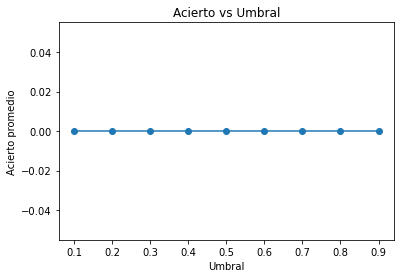

In [48]:
# Crear la figura y los ejes para la gráfica de iteraciones vs learning rate
fig, ax = plt.subplots()
# Agrupar los datos por learning rate y calcular la media de iteraciones para cada grupo
data_lr = resultados_xor.groupby('lr')['iteracion'].mean()
# Graficar los datos
ax.plot(data_lr.index, data_lr.values, 'o-')
# Establecer los títulos y etiquetas de los ejes
ax.set_title('Iteraciones vs Learning rate')
ax.set_xlabel('Learning rate')
ax.set_ylabel('Iteraciones promedio')

# Crear la figura y los ejes para la gráfica de acierto vs learning rate
fig, ax = plt.subplots()
# Agrupar los datos por learning rate y calcular la media de aciertos para cada grupo
data_lr = resultados_xor.groupby('lr')['solucion'].mean()
# Graficar los datos
ax.plot(data_lr.index, data_lr.values, 'o-')
# Establecer los títulos y etiquetas de los ejes
ax.set_title('Acierto vs Learning rate')
ax.set_xlabel('Learning rate')
ax.set_ylabel('Acierto promedio')

# Crear la figura y los ejes para la gráfica de iteraciones vs umbral
fig, ax = plt.subplots()
# Agrupar los datos por umbral y calcular la media de iteraciones para cada grupo
data_umbral = resultados_xor.groupby('umbral')['iteracion'].mean()
# Graficar los datos
ax.plot(data_umbral.index, data_umbral.values, 'o-')
# Establecer los títulos y etiquetas de los ejes
ax.set_title('Iteraciones vs Umbral')
ax.set_xlabel('Umbral')
ax.set_ylabel('Iteraciones promedio')

# Crear la figura y los ejes para la gráfica de acierto vs umbral
fig, ax = plt.subplots()
# Agrupar los datos por umbral y calcular la media de aciertos para cada grupo
data_umbral = resultados_xor.groupby('umbral')['solucion'].mean()
# Graficar los datos
ax.plot(data_umbral.index, data_umbral.values, 'o-')
# Establecer los títulos y etiquetas de los ejes
ax.set_title('Acierto vs Umbral')
ax.set_xlabel('Umbral')
ax.set_ylabel('Acierto promedio')

# Mostrar las gráficas
plt.show()